# THE SPARKS FOUNDATION
## MOHITH H PILLAI
## TASK_2 : PREDICTION USING UNSUPERVISED ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### LOADING THE DATASET

In [2]:
data = pd.read_csv("C:\\Users\\Mohit\\Desktop\\CSV files\\Iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### PREPROCESSING THE DATASET

In [4]:
data = data.drop('Id',axis = 1)

In [5]:
data = data.rename(columns={'SepalLengthCm':'s_l','SepalWidthCm':'s_w','PetalLengthCm':'p_l','PetalWidthCm':'p_w'},inplace=False)

In [6]:
data

,s_l,s_w,p_l,p_w,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data['Species'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: Species, dtype: object

# We will use k-means clustering to find the groups of species formed

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [9]:
x = data.iloc[:,[0,1,2,3]].values

# Now we will use elbow method to find the optimal no. of cluster for our data

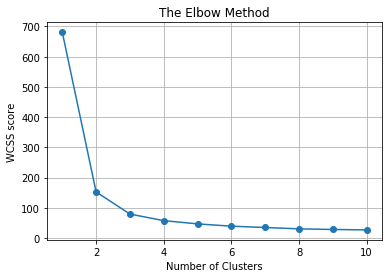

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS score")
plt.title("The Elbow Method")
plt.grid()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y = kmeans.fit_predict(x)

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualization of Clusters

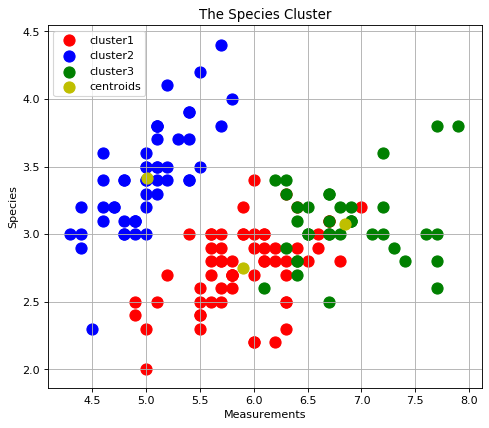

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(7,6),dpi =80)
plt.scatter(x[y==0,0],x[y==0,1],color = 'r', s=100, label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],color = 'b', s=100, label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],color = 'g', s=100, label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='y',s=100,label='centroids')
plt.xlabel('Measurements')
plt.ylabel('Species')
plt.title('The Species Cluster')
plt.legend(loc=2)
plt.grid()
plt.show()